In [7]:
import numpy as np
import ROOT as r
import math

rng = r.TRandom3()

nums = []
for i in range(0, 10000):
    s = []
    for j in range(0,1000):
        s.append(math.sqrt(rng.Uniform(1)))
    nums.append(s)

numarray = np.array(nums)


In [8]:
means = []
for i in range(0, 10000):
    means.append(numarray[i].mean())       

In [9]:
stdDevs = []
for i in range(0, 10000):
    stdDevs.append(numarray[i].std()) 

In [49]:
histogramData = r.TH1F("Stats", "A histogram of data", 20, 0, 1)

for i in range(0,10000):
    for j in range(0, 1000):
        histogramData.Fill(nums[i][j])
r.gStyle.SetOptFit(1111)
r.gStyle.SetStatH(0.1)   
r.gStyle.SetStatW(0.1)  
histogramData.Draw()       

Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


 FCN=128776 FROM MIGRAD    STATUS=CONVERGED     105 CALLS         106 TOTAL
                     EDM=1.39269e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.10154e-01   5.19545e-04   5.07599e-05   2.94348e+00
   2  Mean         9.26002e-01   5.68648e-04   2.49394e-05  -5.52965e+00
   3  Sigma        3.91689e-01   2.84995e-04   1.77822e-05   1.07220e+01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


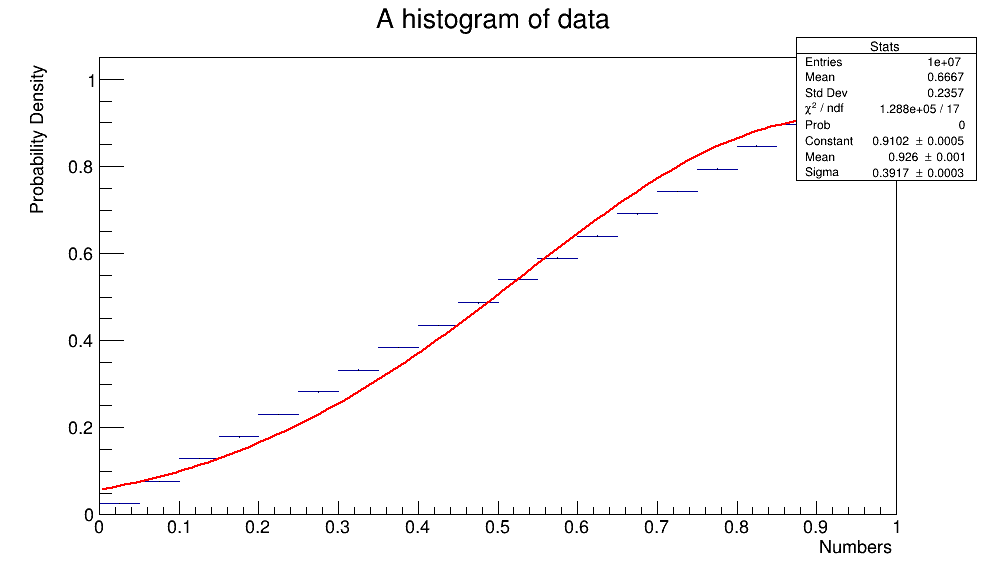

In [57]:
histogramData.Fit("gaus")
bin_width = histogramData.GetBinWidth(1)
integral = histogramData.Integral()

if integral > 0:
    # Normalize the histogram to ensure total area is 1 (probability density)
    histogramData.Scale(1 / (integral * bin_width))

# Now adjust maximum value to ensure it's in the range [0, 1]
max_bin_content = histogramData.GetMaximum()

if max_bin_content > 1:
    histogramData.Scale(1 / max_bin_content)  # Scale down so the max value is 1
histogramData.GetXaxis().SetTitle("Numbers")
histogramData.GetYaxis().SetTitle("Probability Density")


# Draw the histogram
c = r.TCanvas("c", "Canvas", 1000, 600)
histogramData.Draw()
c.Update()
c.Draw()

In [28]:
meanData = r.TH1F("Stats", "A histogram of mean", 70, 0, 1)
meanData.GetXaxis().SetTitle("Numbers")
meanData.GetYaxis().SetTitle("Probability Density")
for i in range(0,10000):
    meanData.Fill(means[i]) 

r.gStyle.SetOptFit(1111)
r.gStyle.SetStatH(0.1)   
r.gStyle.SetStatW(0.1)   

Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


 FCN=1.30393 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=4.53501e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.04413e+00   1.25196e-02   7.73909e-06   8.22995e-03
   2  Mean         6.66702e-01   8.60808e-05   3.17908e-07   2.78281e-01
   3  Sigma        8.54586e-03   5.71892e-05   1.38220e-06   4.06680e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


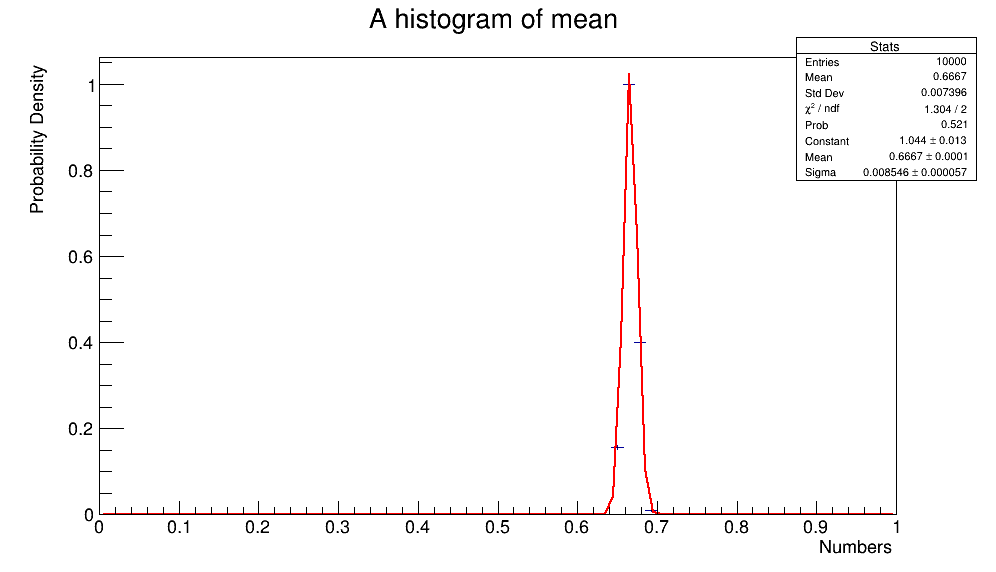

In [35]:

bin_width = meanData.GetBinWidth(1)
integral = meanData.Integral()

if integral > 0:
    # Normalize the histogram to ensure total area is 1 (probability density)
    meanData.Scale(1 / (integral * bin_width))

# Now adjust maximum value to ensure it's in the range [0, 1]
max_bin_content = meanData.GetMaximum()

if max_bin_content > 1:
    meanData.Scale(1 / max_bin_content)  # Scale down so the max value is 1

meanData.Fit("gaus")
# Draw the histogram
c = r.TCanvas("c", "Canvas", 1000, 600)
meanData.Draw()
c.Update()
c.Draw()

In [41]:
stdData = r.TH1F("Stats", "A histogram of Standard Devs", 70, 0, 1)
stdData.GetXaxis().SetTitle("Numbers")
stdData.GetYaxis().SetTitle("Probability Density")

for i in range(0,10000):
    stdData.Fill(stdDevs[i]) 

r.gStyle.SetOptFit(1111) 
r.gStyle.SetStatH(0.1)   
r.gStyle.SetStatW(0.1)   

Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


 FCN=3.60944e-09 FROM MIGRAD    STATUS=CONVERGED     119 CALLS         120 TOTAL
                     EDM=3.71164e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.00059e+00   1.05876e-02  -2.89865e-05  -1.15356e-02
   2  Mean         2.35507e-01   7.75493e-05   4.71756e-08   1.94757e-01
   3  Sigma        6.01390e-03   3.42718e-05   3.37549e-06  -5.47928e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


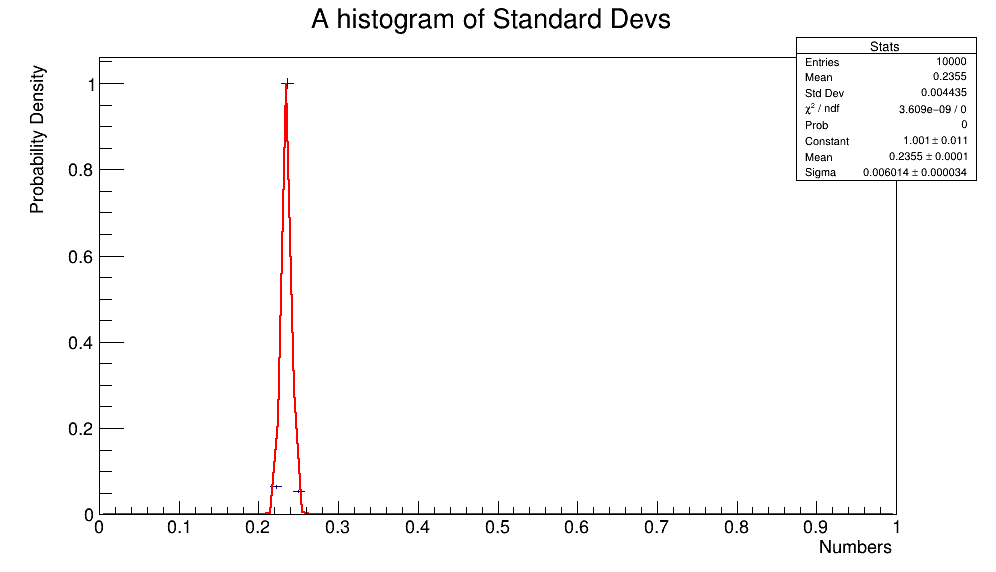

In [42]:

bin_width = stdData.GetBinWidth(1)
integral = stdData.Integral()

if integral > 0:
    # Normalize the histogram to ensure total area is 1 (probability density)
    stdData.Scale(1 / (integral * bin_width))

# Now adjust maximum value to ensure it's in the range [0, 1]
max_bin_content = stdData.GetMaximum()

if max_bin_content > 1:
    stdData.Scale(1 / max_bin_content) 




stdData.Fit("gaus")
# Draw the histogram
c = r.TCanvas("c", "Canvas", 1000, 600)
stdData.Draw()
c.Update()
c.Draw()

In [38]:
import math

meData = r.TH1F("Stats", "A histogram of Error in Mean", 70, 0, 0.01)
meData.GetXaxis().SetTitle("Numbers")
meData.GetYaxis().SetTitle("Probability Density")

for i in range(0,10000):
    meData.Fill(stdDevs[i]/math.sqrt(10000)) 

r.gStyle.SetOptStat(1111)  
r.gStyle.SetStatH(0.1)   
r.gStyle.SetStatW(0.1)  
 

Warning in <TROOT::Append>: Replacing existing TH1: Stats (Potential memory leak).


 FCN=3.67105e-09 FROM MIGRAD    STATUS=CONVERGED     119 CALLS         120 TOTAL
                     EDM=3.77331e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.00059e+00   1.05873e-02  -2.91887e-05  -1.16531e-02
   2  Mean         2.35507e-03   7.75484e-07   4.79888e-10   1.97903e+01
   3  Sigma        6.01390e-05   3.42742e-07   3.42869e-06  -5.95293e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


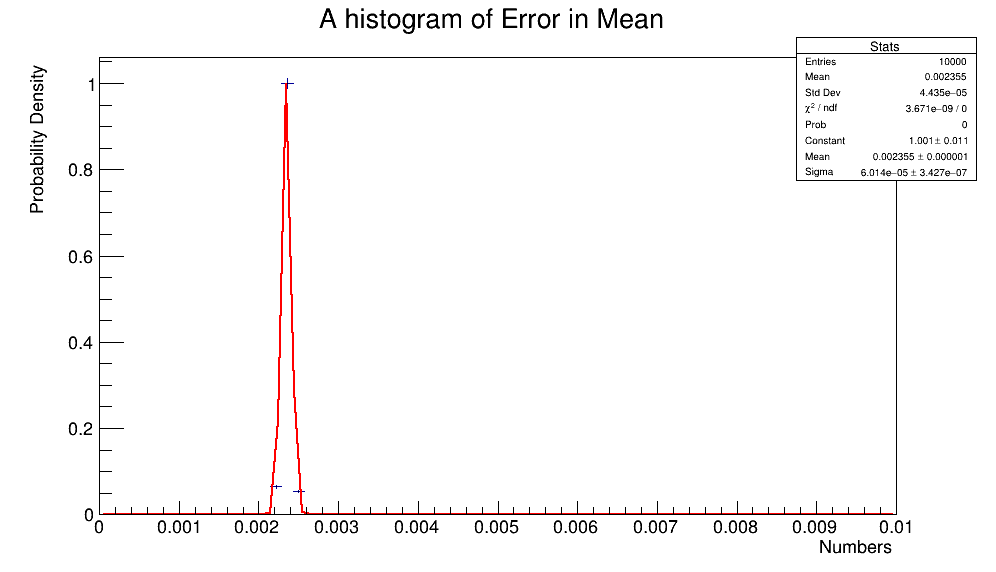

In [39]:
bin_width = meData.GetBinWidth(1)
integral = meData.Integral()

if integral > 0:
    # Normalize the histogram to ensure total area is 1 (probability density)
    meData.Scale(1 / (integral * bin_width))

# Now adjust maximum value to ensure it's in the range [0, 1]
max_bin_content = meData.GetMaximum()

if max_bin_content > 1:
    meData.Scale(1 / max_bin_content)  # Scale down so the max value is 1



meData.Fit("gaus")
# Draw the histogram
c = r.TCanvas("c", "Canvas", 1000, 600)
meData.Draw()
c.Update()
c.Draw()